#EXPERIMENT

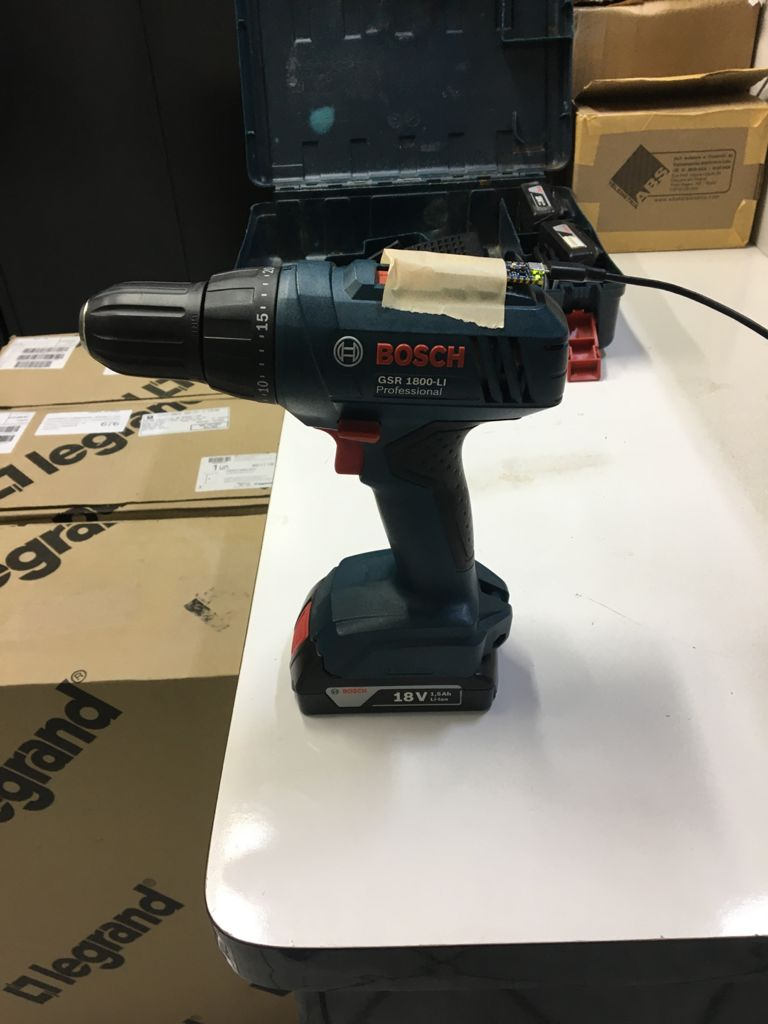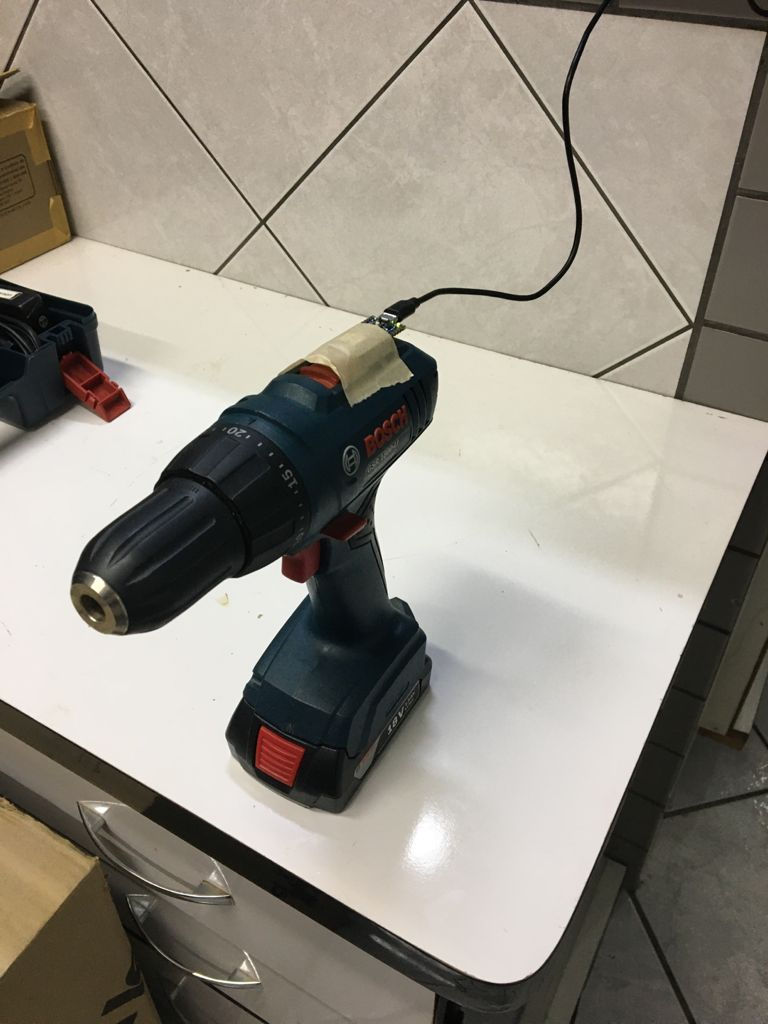

#Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


#Import Librarys


In [ ]:
!pip install tsfresh

     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████████████| 113 kB 23.8 MB/s 
     |████████████████████████████████| 776 kB 42.4 MB/s 
     |████████████████████████████████| 1.1 MB 40.7 MB/s 
     |████████████████████████████████| 118 kB 54.7 MB/s 
     |████████████████████████████████| 769 kB 67.2 MB/s 
     |████████████████████████████████| 766 kB 65.3 MB/s 
     |████████████████████████████████| 1.0 MB 30.8 MB/s 
     |████████████████████████████████| 722 kB 50.0 MB/s 
     |████████████████████████████████| 722 kB 64.9 MB/s 
     |████████████████████████████████| 715 kB 38.5 MB/s 
     |████████████████████████████████| 705 kB 39.2 MB/s 
     |████████████████████████████████| 699 kB 47.4 MB/s 
     |████████████████████████████████| 696 kB 71.4 MB/s 
     |████████████████████████████████| 684 kB 58.8 MB/s 
     |████████████████████████████████| 679 kB 48.7 MB/s 
     |████████████████████████████████| 675 kB 66.8 MB/s 
     |██████████

In [ ]:
from tsfresh.feature_extraction import MinimalFCParameters

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip install cbor2

     |████████████████████████████████| 199 kB 7.2 MB/s 


In [ ]:
from tsfresh.feature_extraction import extract_features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import cbor2

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

#Plot

In [ ]:
path_DES = Path("/content/mydrive/MyDrive/projetos/Assignment 3 - Real Problem/Data/Des/00_Des.cbor", '')
path_LIG_1 = Path("/content/mydrive/MyDrive/projetos/Assignment 3 - Real Problem/Data/Lig_1/00_Lig_1.cbor", '')
path_LIG_2 = Path("/content/mydrive/MyDrive/projetos/Assignment 3 - Real Problem/Data/Lig_2/00_Lig_2.cbor", '')

with open(path_DES, 'rb') as fp:
        obj = cbor2.load(fp)
        x = obj['payload']['values']
        my_array = np.array(x)
        df_DES = pd.DataFrame(my_array)
        df_DES.columns = ["Ax", "Ay", "Az"]

with open(path_LIG_1, 'rb') as fp:
        obj = cbor2.load(fp)
        x = obj['payload']['values']
        my_array = np.array(x)
        df_LIG_1 = pd.DataFrame(my_array)
        df_LIG_1.columns = ["Ax", "Ay", "Az"]

with open(path_LIG_2, 'rb') as fp:
        obj = cbor2.load(fp)
        x = obj['payload']['values']
        my_array = np.array(x)
        df_LIG_2 = pd.DataFrame(my_array)
        df_LIG_2.columns = ["Ax", "Ay", "Az"]

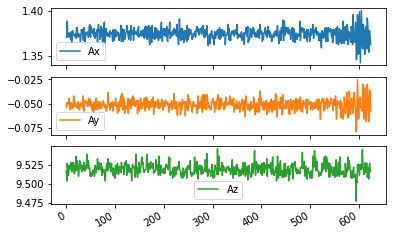

In [ ]:
axes = df_DES.plot.line(subplots=True)
type(axes)
plt.show()

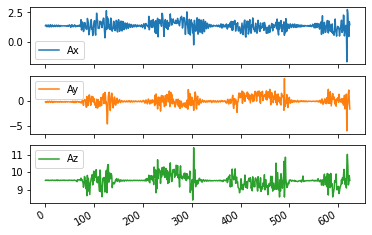

In [ ]:
axes = df_LIG_1.plot.line(subplots=True)
type(axes)
plt.show()

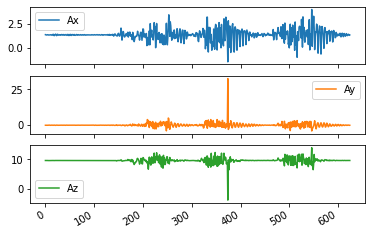

In [ ]:
axes = df_LIG_2.plot.line(subplots=True)
type(axes)
plt.show()

#Load Data / Extraction

In [ ]:
path_des = Path("/content/mydrive/MyDrive/projetos/Assignment 3 - Real Problem/Data/Des", '')
path_Lig01 = Path("/content/mydrive/MyDrive/projetos/Assignment 3 - Real Problem/Data/Lig_1", '')
path_Lig02 = Path("/content/mydrive/MyDrive/projetos/Assignment 3 - Real Problem/Data/Lig_2", '')

df_des = pd.DataFrame()
df_Lig01 = pd.DataFrame()
df_Lig02 = pd.DataFrame()

var_des = {
    'Ax': 0,
    'Az': 1,
    'Ay': 2,
    'id': 3
}

df_fc_p = MinimalFCParameters()

In [ ]:
  a = 0  
  for i in path_des.iterdir():
      with open(i, 'rb') as fp:
        obj = cbor2.load(fp)
        x = obj['payload']['values']
        my_array = np.array(x)
        df = pd.DataFrame(my_array)
        df.columns = ["Ax", "Ay", "Az"]
        df["id"] = a
        extracted_features = extract_features(df, column_id='id', default_fc_parameters= df_fc_p)
        df_des = df_des.append(extracted_features)
        a+=1

  
  b = 0
  for i in path_Lig01.iterdir():
    with open(i, 'rb') as fp:
      obj = cbor2.load(fp)
      x = obj['payload']['values']
      my_array = np.array(x)
      df = pd.DataFrame(my_array)
      df.columns = ["Ax", "Ay", "Az"]
      df["id"] = b
      extracted_features = extract_features(df, column_id='id', default_fc_parameters= df_fc_p)
      df_Lig01 = df_Lig01.append(extracted_features)
      b+=1

  
  c = 0
  for i in path_Lig02.iterdir():
    with open(i, 'rb') as fp:
      obj = cbor2.load(fp)
      x = obj['payload']['values']
      my_array = np.array(x)
      df = pd.DataFrame(my_array)
      df.columns = ["Ax", "Ay", "Az"]
      df["id"] = c
      extracted_features = extract_features(df, column_id='id', default_fc_parameters= df_fc_p)
      df_Lig02 = df_Lig02.append(extracted_features)
      c+=1


df_des["Label"] = 0
df_Lig01["Label"] = 1
df_Lig02["Label"] = 2




Feature Extraction: 100%|██████████| 3/3 [00:00<00:00, 797.50it/s]


In [ ]:
df_des

,Ax__sum_values,Ax__median,Ax__mean,Ax__length,Ax__standard_deviation,Ax__variance,Ax__root_mean_square,Ax__maximum,Ax__minimum,Ay__sum_values,Ay__median,Ay__mean,Ay__length,Ay__standard_deviation,Ay__variance,Ay__root_mean_square,Ay__maximum,Ay__minimum,Az__sum_values,Az__median,Az__mean,Az__length,Az__standard_deviation,Az__variance,Az__root_mean_square,Az__maximum,Az__minimum,Label
0,859.007232,1.374272,1.374412,625.0,0.006237,0.000039,1.374426,1.400608,1.341950,-31.925482,-0.050278,-0.051081,625.0,0.005594,0.000031,0.051386,-0.025139,-0.079009,5949.313447,9.518148,9.518902,625.0,0.007250,0.000053,9.518904,9.545682,9.477448,0
1,857.717956,1.373075,1.372349,625.0,0.005113,0.000026,1.372358,1.388637,1.356315,-31.625010,-0.050278,-0.050600,625.0,0.004861,0.000024,0.050833,-0.035913,-0.063446,5949.216472,9.518148,9.518746,625.0,0.006737,0.000045,9.518749,9.545682,9.497798,0
2,857.908295,1.373075,1.372653,625.0,0.009355,0.000088,1.372685,1.406593,1.343147,-32.084697,-0.051475,-0.051336,625.0,0.009283,0.000086,0.052168,-0.027533,-0.076614,5949.546882,9.518148,9.519275,625.0,0.006586,0.000043,9.519277,9.548077,9.495404,0
3,857.304957,1.370680,1.371688,625.0,0.008148,0.000066,1.371712,1.399411,1.346738,-32.491711,-0.052672,-0.051987,625.0,0.008832,0.000078,0.052732,-0.020351,-0.082600,5949.568432,9.519346,9.519309,625.0,0.006806,0.000046,9.519312,9.545682,9.502586,0
4,856.804569,1.370680,1.370887,625.0,0.005265,0.000028,1.370897,1.388637,1.355118,-32.624589,-0.052672,-0.052199,625.0,0.005203,0.000027,0.052458,-0.038307,-0.068235,5949.001006,9.518148,9.518402,625.0,0.006340,0.000040,9.518404,9.540894,9.501390,0
5,856.520856,1.370680,1.370433,625.0,0.005102,0.000026,1.370443,1.385046,1.356315,-31.990126,-0.051475,-0.051184,625.0,0.005250,0.000028,0.051453,-0.034716,-0.070629,5949.227260,9.518148,9.518764,625.0,0.006758,0.000046,9.518766,9.540894,9.501390,0
6,856.996105,1.370680,1.371194,625.0,0.005218,0.000027,1.371204,1.387440,1.357512,-32.261868,-0.051475,-0.051619,625.0,0.005292,0.000028,0.051890,-0.032322,-0.067038,5950.219640,9.519346,9.520351,625.0,0.006506,0.000042,9.520354,9.550470,9.504981,0
7,857.202006,1.371878,1.371523,625.0,0.005052,0.000026,1.371533,1.385046,1.355118,-32.434250,-0.051475,-0.051895,625.0,0.004734,0.000022,0.052110,-0.035913,-0.068235,5950.603928,9.520543,9.520966,625.0,0.006908,0.000048,9.520969,9.542090,9.502586,0
8,856.567543,1.370680,1.370508,625.0,0.007239,0.000052,1.370527,1.394622,1.344344,-32.091879,-0.051475,-0.051347,625.0,0.006865,0.000047,0.051804,-0.027533,-0.075417,5949.852141,9.519346,9.519763,625.0,0.006440,0.000041,9.519766,9.542090,9.504981,0
9,856.445439,1.370680,1.370313,625.0,0.005877,0.000035,1.370325,1.386243,1.350330,-31.715990,-0.051475,-0.050746,625.0,0.005228,0.000027,0.051014,-0.037110,-0.068235,5951.407160,9.521740,9.522251,625.0,0.006879,0.000047,9.522254,9.550470,9.503783,0


In [ ]:
df_Lig01

,Ax__sum_values,Ax__median,Ax__mean,Ax__length,Ax__standard_deviation,Ax__variance,Ax__root_mean_square,Ax__maximum,Ax__minimum,Ay__sum_values,Ay__median,Ay__mean,Ay__length,Ay__standard_deviation,Ay__variance,Ay__root_mean_square,Ay__maximum,Ay__minimum,Az__sum_values,Az__median,Az__mean,Az__length,Az__standard_deviation,Az__variance,Az__root_mean_square,Az__maximum,Az__minimum,Label
0,845.025110,1.356315,1.352040,625.0,0.377578,0.142565,1.403773,2.747346,-1.705869,-5.671864,-0.136469,-0.009075,625.0,0.798720,0.637954,0.798772,4.325125,-5.948394,5952.047648,9.521740,9.523276,625.0,0.327741,0.107414,9.528914,11.404779,8.392874,1
1,835.748775,1.364695,1.337198,625.0,0.331441,0.109853,1.377662,2.579752,-0.093374,-53.725886,-0.099359,-0.085961,625.0,0.694052,0.481708,0.699355,2.782062,-3.837905,5937.508880,9.512163,9.500014,625.0,0.324376,0.105220,9.505550,12.027272,7.461530,1
2,837.160155,1.361104,1.339456,625.0,0.368128,0.135518,1.389122,2.698265,-0.256180,4.720169,-0.083797,0.007552,625.0,0.663005,0.439576,0.663048,3.427300,-3.014300,5935.157754,9.516952,9.496252,625.0,0.331268,0.109738,9.502029,11.107899,7.809886,1
3,856.894364,1.365892,1.371031,625.0,0.339567,0.115306,1.412456,3.570952,-0.750582,-19.536686,-0.083797,-0.031259,625.0,0.628057,0.394455,0.628834,3.530250,-2.121263,5967.894876,9.519346,9.548632,625.0,0.308558,0.095208,9.553616,11.404779,8.479065,1
4,853.474247,1.365892,1.365559,625.0,0.367764,0.135251,1.414214,4.754885,-0.197522,32.720357,-0.079009,0.052353,625.0,0.795188,0.632323,0.796909,4.520253,-3.365051,5944.010314,9.515755,9.510417,625.0,0.276354,0.076371,9.514431,10.668563,7.789535,1
5,853.300668,1.363498,1.365281,625.0,0.351164,0.123316,1.409719,3.393781,-0.239420,1.665166,-0.071826,0.002664,625.0,0.839075,0.704046,0.839079,3.749320,-5.197812,5935.135026,9.518148,9.496216,625.0,0.297193,0.088323,9.500865,10.435128,7.230489,1
6,850.027793,1.367089,1.360044,625.0,0.310317,0.096297,1.394997,2.446874,-1.322796,-3.344699,-0.073023,-0.005352,625.0,0.779427,0.607506,0.779445,4.097676,-3.530250,5950.012582,9.512163,9.520020,625.0,0.286310,0.081973,9.524324,10.726024,8.091205,1
7,845.415365,1.361104,1.352665,625.0,0.329851,0.108802,1.392301,3.537433,0.204704,22.494722,-0.073023,0.035992,625.0,0.835600,0.698227,0.836375,4.661511,-3.105280,5948.348619,9.513360,9.517358,625.0,0.345231,0.119184,9.523617,13.945027,8.409634,1
8,845.709851,1.359907,1.353136,625.0,0.275954,0.076151,1.380988,2.401384,-1.035492,4.862624,-0.070629,0.007780,625.0,0.657183,0.431889,0.657229,2.321178,-5.061342,5942.209882,9.513360,9.507536,625.0,0.255677,0.065371,9.510973,10.554838,8.204929,1
9,848.521842,1.368286,1.357635,625.0,0.328729,0.108063,1.396866,2.541445,-0.429759,-8.045715,-0.061052,-0.012873,625.0,0.802037,0.643263,0.802140,6.865374,-4.806360,5938.583864,9.513360,9.501734,625.0,0.328020,0.107597,9.507394,10.864887,6.951565,1


In [ ]:
df_Lig02

,Ax__sum_values,Ax__median,Ax__mean,Ax__length,Ax__standard_deviation,Ax__variance,Ax__root_mean_square,Ax__maximum,Ax__minimum,Ay__sum_values,Ay__median,Ay__mean,Ay__length,Ay__standard_deviation,Ay__variance,Ay__root_mean_square,Ay__maximum,Ay__minimum,Az__sum_values,Az__median,Az__mean,Az__length,Az__standard_deviation,Az__variance,Az__root_mean_square,Az__maximum,Az__minimum,Label
0,855.974989,1.375469,1.369560,625.0,0.596539,0.355859,1.493839,3.999514,-1.414973,97.540973,-0.021548,0.156066,625.0,1.706480,2.912072,1.713601,32.638954,-4.071340,5939.284152,9.542090,9.502855,625.0,0.908718,0.825769,9.546204,13.888764,-3.901352,2
1,844.737806,1.380257,1.351580,625.0,0.625929,0.391787,1.489482,3.342306,-2.221819,66.492967,-0.004788,0.106389,625.0,1.886071,3.557264,1.889069,28.992586,-7.928399,5969.987418,9.545682,9.551980,625.0,0.663926,0.440798,9.575026,13.869611,5.946000,2
2,823.709533,1.367089,1.317935,625.0,0.565605,0.319910,1.434177,4.574122,-1.464054,72.444952,-0.004788,0.115912,625.0,2.133644,4.552438,2.136790,31.042023,-20.879833,5931.137885,9.544485,9.489821,625.0,0.736303,0.542142,9.518342,12.071565,-2.573767,2
3,837.273881,1.386243,1.339638,625.0,0.503289,0.253300,1.431059,3.136404,-1.283292,24.513035,-0.007183,0.039221,625.0,1.104117,1.219074,1.104813,3.634398,-5.840655,5952.653385,9.545682,9.524245,625.0,0.630197,0.397148,9.545072,14.560338,6.573281,2
4,870.350975,1.397017,1.392562,625.0,0.625579,0.391349,1.526623,4.320337,-3.965995,-31.960198,-0.008380,-0.051136,625.0,1.716847,2.947564,1.717608,4.704607,-30.478188,5988.972225,9.544485,9.582356,625.0,0.717515,0.514828,9.609181,16.417042,6.748057,2
5,844.481626,1.381454,1.351171,625.0,0.707888,0.501105,1.525374,6.314707,-5.374983,69.170881,-0.003591,0.110673,625.0,1.500357,2.251071,1.504433,13.608643,-13.588292,5944.525061,9.544485,9.511240,625.0,0.657399,0.432174,9.533932,11.969811,6.281188,2
6,851.326648,1.385046,1.362123,625.0,0.579326,0.335619,1.480202,3.939659,-0.822408,13.260286,-0.011971,0.021216,625.0,1.104356,1.219601,1.104559,4.572925,-4.195838,5957.368756,9.542090,9.531790,625.0,0.682487,0.465788,9.556192,12.557588,5.778406,2
7,879.493235,1.389834,1.407189,625.0,0.575716,0.331449,1.520405,3.956418,-0.679953,52.345629,-0.011971,0.083753,625.0,1.124992,1.265607,1.128105,6.194997,-4.874595,5964.820704,9.540894,9.543713,625.0,0.654817,0.428786,9.566151,12.758701,4.563348,2
8,869.894880,1.395820,1.391832,625.0,0.596149,0.355394,1.514130,3.799598,-1.237802,75.019917,-0.002394,0.120032,625.0,1.437363,2.066012,1.442366,5.887342,-14.525621,5974.186831,9.543288,9.558699,625.0,0.717641,0.515008,9.585600,14.449007,5.798757,2
9,846.534654,1.382651,1.354455,625.0,0.604035,0.364858,1.483040,4.491522,-1.640028,12.957418,-0.013168,0.020732,625.0,1.535812,2.358720,1.535952,12.962208,-18.699913,5966.685793,9.540894,9.546697,625.0,0.751532,0.564801,9.576233,12.667721,5.632360,2


#Train

In [ ]:
  frames = [df_des, df_Lig01, df_Lig02]
  DF = pd.concat(frames)


In [ ]:
  DF.columns

Index(['Ax__sum_values', 'Ax__median', 'Ax__mean', 'Ax__length',
       'Ax__standard_deviation', 'Ax__variance', 'Ax__root_mean_square',
       'Ax__maximum', 'Ax__minimum', 'Ay__sum_values', 'Ay__median',
       'Ay__mean', 'Ay__length', 'Ay__standard_deviation', 'Ay__variance',
       'Ay__root_mean_square', 'Ay__maximum', 'Ay__minimum', 'Az__sum_values',
       'Az__median', 'Az__mean', 'Az__length', 'Az__standard_deviation',
       'Az__variance', 'Az__root_mean_square', 'Az__maximum', 'Az__minimum',
       'Label'],
      dtype='object')

In [ ]:
variaveis = [
       'Ax__sum_values', 'Ax__median', 'Ax__mean', 'Ax__length',
       'Ax__standard_deviation', 'Ax__variance', 'Ax__root_mean_square',
       'Ax__maximum', 'Ax__minimum', 'Ay__sum_values', 'Ay__median',
       'Ay__mean', 'Ay__length', 'Ay__standard_deviation', 'Ay__variance',
       'Ay__root_mean_square', 'Ay__maximum', 'Ay__minimum', 'Az__sum_values',
       'Az__median', 'Az__mean', 'Az__length', 'Az__standard_deviation',
       'Az__variance', 'Az__root_mean_square', 'Az__maximum', 'Az__minimum'
            ]

X = DF[variaveis]
Y = DF['Label']

X_treino, X_valid, y_treino, y_valid = train_test_split(X, Y, test_size=0.3)

In [ ]:
modelo = RandomForestClassifier(n_estimators=100 ,n_jobs=-1, random_state=0)

In [ ]:
modelo.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
  accuracy_score(y_valid, modelo.predict(X_valid))

1.0

In [ ]:
  clf = DecisionTreeClassifier()
  clf.fit(X_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
  accuracy_score(y_valid, clf.predict(X_valid))

0.9629629629629629

In [ ]:
  from sklearn import svm
  norm = MinMaxScaler()
  X_norm = norm.fit_transform(X)
  X_t, X_v, y_t, y_v = train_test_split(X_norm, Y, test_size=0.3)

  clfv = svm.SVC()
  clfv.fit(X_t, y_t)
  clfv.score(X_v, y_v)

1.0

In [ ]:
  from sklearn import metrics

  #Random Forest
  scores_rf = cross_val_score(modelo, X, Y, cv=10, scoring='accuracy')
  scores_rf

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.88888889, 1.        , 1.        , 1.        , 1.        ])

In [ ]:
  #Decision Tree Classifier
  scores_dtc = cross_val_score(clf, X, Y, cv=10, scoring= 'accuracy')
  scores_dtc

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.77777778, 1.        , 1.        , 1.        , 1.        ])

In [ ]:
  #Support Vector Machine
  X_n = norm.fit_transform(X)
  scores_svm = cross_val_score(clfv, X_n, Y, cv= 10, scoring= 'accuracy')
  scores_svm

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.88888889, 1.        , 1.        , 1.        , 1.        ])